In [1]:
import pandas as pd
import numpy as np

In [3]:
house_data = pd.read_csv('Housing.csv')

In [4]:
print(house_data.info())
print(house_data.describe())
print(house_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
categorical_cols = ['furnishingstatus', 'mainroad', 'guestroom', 'basement', 
                    'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    house_data[col] = label_encoder.fit_transform(house_data[col])

In [9]:
from sklearn.model_selection import train_test_split

X = house_data.drop('price', axis=1)  # Features
y = house_data['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 979679.6912959905
Mean Squared Error: 1771751116594.0344
R² Score: 0.6494754192267804


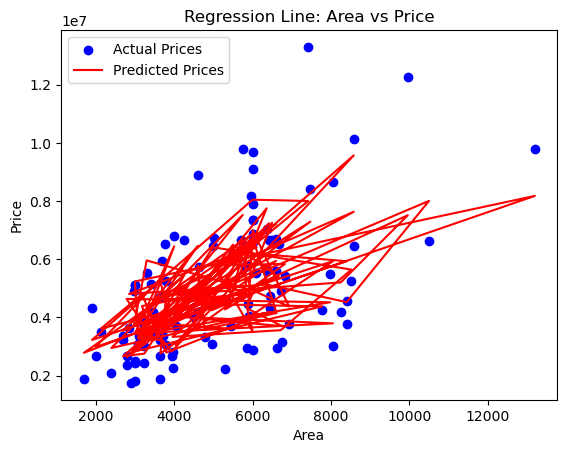

                   Coefficient
area              2.358488e+02
bedrooms          7.857449e+04
bathrooms         1.097117e+06
stories           4.062232e+05
mainroad          3.668242e+05
guestroom         2.331468e+05
basement          3.931598e+05
hotwaterheating   6.878813e+05
airconditioning   7.855506e+05
parking           2.257565e+05
prefarea          6.299017e+05
furnishingstatus -2.103971e+05


In [12]:
import matplotlib.pyplot as plt

# Plot regression line for 'area' vs 'price'
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['area'], lr_model.predict(X_test), color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line: Area vs Price')
plt.legend()
plt.show()

# Interpret coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
